In [1]:
#import libraries
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt


In [2]:
# import dataset
dataset=pd.read_csv('Clustering data.csv')

In [3]:
# get year,day and month info from date column
dataset['Open Date'] = pd.to_datetime(dataset['Open Date']) 
dataset['dayOfWeek'] = dataset['Open Date'].dt.day_name() 
dataset['month'] = dataset['Open Date'].dt.month
dataset['year'] = dataset['Open Date'].dt.year

In [4]:
# impute columns based on legened provided
dataset['Pharmacy_IND'] = dataset['Pharmacy_IND'].replace(['N','Y'],[0,1])
dataset['Pickup_IND'] = dataset['Pickup_IND'].replace(['N','Y'],[0,1])
dataset['SFS_IND'] = dataset['SFS_IND'].replace(['N','Y'],[0,1])
dataset['COMP_IND'] = dataset['COMP_IND'].replace(['-'],[np.nan])
dataset['COMP_IND'] = dataset['COMP_IND'].replace(['N','Y'],[0,1])
dataset['College_STORE_IND'] = dataset['College_STORE_IND'].replace(['N','Y'],[0,1])
dataset['dayOfWeek'] = dataset['dayOfWeek'].replace(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],[0,0,0,0,0,1,1])


In [5]:
#select required columns
data=dataset[['StoreNum','State Provinc','Market','Region','Locality Code','Climate Code','Pharmacy_IND','Pickup_IND','SFS_IND','COMP_IND','College_STORE_IND','INCOME_CD','ETHNICITY_CD','dayOfWeek','month','year']]

In [6]:
# calculate percent of null values within each column
data.isna().mean().round(4) * 100

StoreNum              0.00
State Provinc         0.00
Market                0.00
Region               47.54
Locality Code        61.62
Climate Code         64.08
Pharmacy_IND         17.25
Pickup_IND            0.35
SFS_IND               8.80
COMP_IND             60.21
College_STORE_IND    17.25
INCOME_CD            61.27
ETHNICITY_CD         61.62
dayOfWeek             0.00
month                 0.00
year                  0.00
dtype: float64

In [7]:
# select required columns that we want to train
master_data=data.drop(['StoreNum','State Provinc','Market','Region','month','year'],axis=1)

In [8]:
master_data=master_data.dropna()
master_data.shape

(98, 10)

In [9]:
# Convert the data frame into a 2-D array
X = master_data.iloc[:,:].values

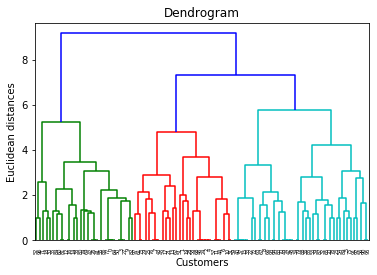

In [10]:

#Plot dendrogram to identify optimum number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [11]:
# tarin the model to segregate the data into different clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [12]:
print(y_hc)

[2 0 0 2 0 1 0 0 3 2 0 0 2 0 2 3 2 0 4 0 1 0 3 1 0 0 2 2 0 0 4 0 1 3 1 2 1
 3 2 1 3 2 2 0 0 0 0 3 3 3 2 0 4 1 1 2 1 0 0 3 2 0 0 3 2 1 3 3 0 2 3 4 3 0
 2 1 0 2 1 1 2 2 2 3 2 1 2 1 1 1 1 1 1 3 3 1 4 0]


In [13]:
master_data.insert(0,'cluster',y_hc)